<a href="https://colab.research.google.com/github/asanam767/OIBSIP/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME - Katta Manasa DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE TASK 5**

**PROJECT NAME -  SALES PREDICTION USING PYTHON**

**GITHUB LINK**: [https://github.com/asanam767/OIBSIP](https://github.com/asanam767/OIBSIP)

---

**Problem Statement:**

Laptop with Browser Icon
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [25]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
#loading the data set
data=pd.read_csv('/content/Advertising.csv')

In [3]:
#first five rows of the dataframe
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#number of data points and number of features
data.shape

(200, 5)

In [5]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#check for missing values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
#dropping the unnamed column
data=data.drop(['Unnamed: 0'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sns.set()

<ipython-input-12-dcbac23af426>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TV'])


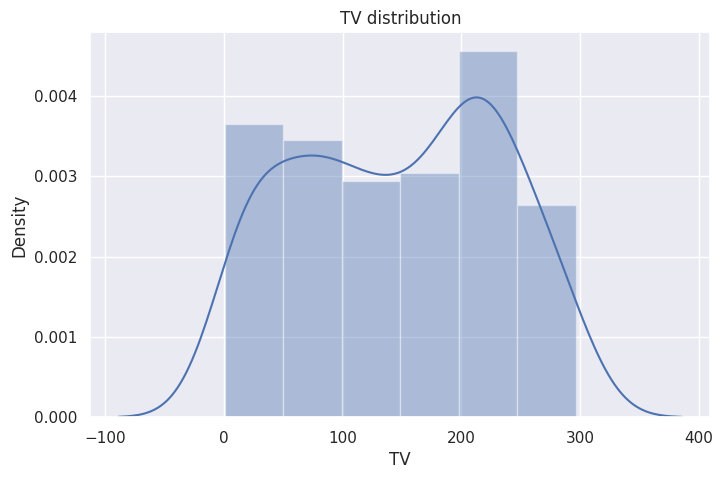

In [12]:
#TV distribution
plt.figure(figsize=(8,5))
plt.title('TV distribution')
sns.distplot(data['TV'])
plt.show()

<ipython-input-13-6c49b553c1c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Radio'])


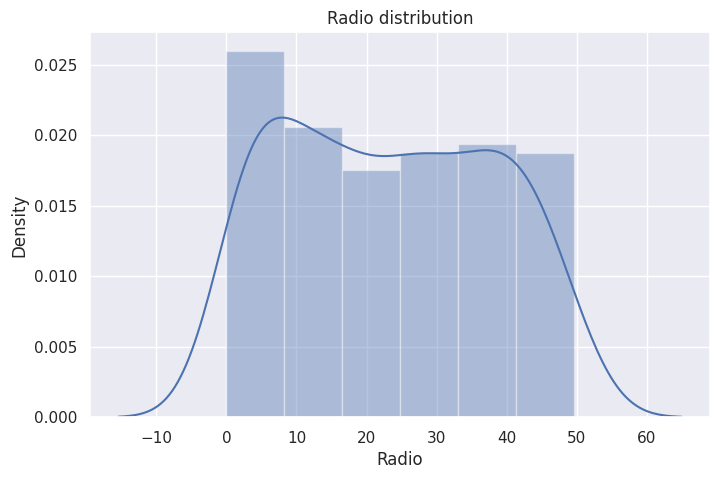

In [13]:
#Radio Distribution
plt.figure(figsize=(8,5))
plt.title('Radio distribution')
sns.distplot(data['Radio'])
plt.show()

<ipython-input-14-1c42898017b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'])


<Axes: title={'center': 'Newspaper distribution'}, xlabel='Newspaper', ylabel='Density'>

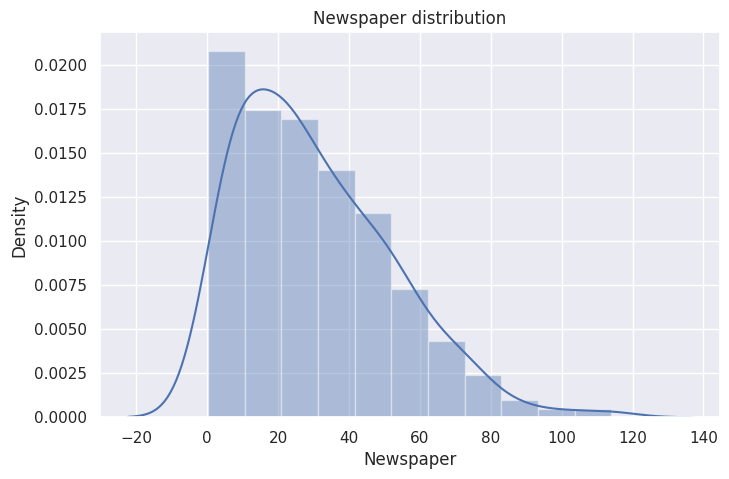

In [14]:
#Newspaper Distribution
plt.figure(figsize=(8,5))
plt.title('Newspaper distribution')
sns.distplot(data['Newspaper'])

<ipython-input-15-fd5f1bd29144>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])


<Axes: title={'center': 'Sales distribution'}, xlabel='Sales', ylabel='Density'>

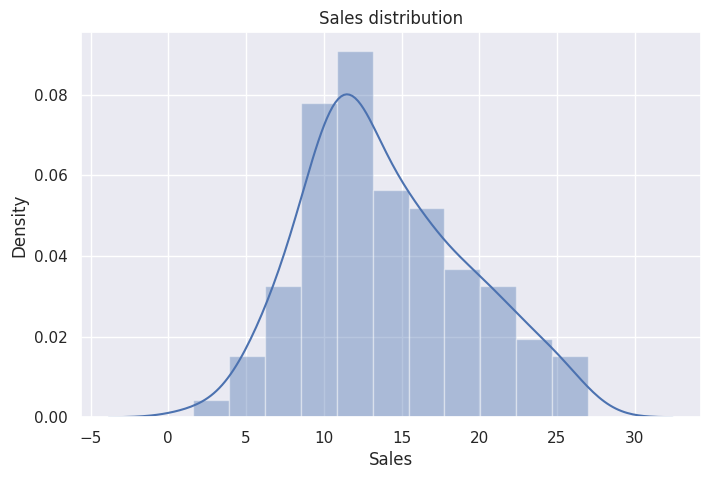

In [15]:
#Sales Distribution
plt.figure(figsize=(8,5))
plt.title('Sales distribution')
sns.distplot(data['Sales'])

In [16]:
#splitting into features and target
X=data.drop(['Sales'],axis=1)
Y=data.Sales

In [17]:
print(X)
print(Y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [18]:
#splitting data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(200, 3) (160, 3) (40, 3)


In [26]:
#scaling our data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
#machine learning model training
regressor=XGBRegressor()

In [27]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
#predicting on training data
training_data_prediction=regressor.predict(X_train)

In [29]:
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)


In [30]:
print('R squared value= ',r2_train)

R squared value=  0.9999999295553631


In [31]:
#predicting on test data
test_data_prediction=regressor.predict(X_test)

In [32]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [33]:
print('R squared value= ',r2_test)

R squared value=  0.9549568356105793
